In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/DELL/Desktop/Udemy/udemy- Data Analytics using python/car_data.csv",index_col="User ID")

In [3]:
df.head()

,Gender,Age,AnnualSalary,Purchased
User ID,,,,
385,Male,35,20000,0
681,Male,40,43500,0
353,Male,49,74000,0
895,Male,40,107500,1
661,Male,25,79000,0


In [4]:
df.shape

(1000, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 385 to 687
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        1000 non-null   object
 1   Age           1000 non-null   int64 
 2   AnnualSalary  1000 non-null   int64 
 3   Purchased     1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 39.1+ KB


In [26]:
df.drop_duplicates(inplace=True)

In [27]:
df.shape

(943, 4)

In [28]:
df.isna().sum()

Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [29]:
df.describe()

,Age,AnnualSalary,Purchased
count,943.00000,943.000000,943.000000
mean,40.04666,73575.291622,0.415695
std,10.85036,35053.956806,0.493103
min,18.00000,15000.000000,0.000000
25%,32.00000,46500.000000,0.000000
50%,40.00000,72500.000000,0.000000
75%,48.00000,91500.000000,1.000000
max,63.00000,152500.000000,1.000000


In [30]:
df.columns

Index(['Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

In [72]:
df2=pd.get_dummies(df,dtype=int)

In [73]:
df2

,Age,AnnualSalary,Purchased,Gender_Female,Gender_Male
User ID,,,,,
385,35,20000,0,0,1
681,40,43500,0,0,1
353,49,74000,0,0,1
895,40,107500,1,0,1
661,25,79000,0,0,1
...,...,...,...,...,...
863,38,59000,0,0,1
800,47,23500,0,1,0
407,28,138500,1,1,0


In [74]:
del df2["Gender_Female"]

In [75]:
df2

,Age,AnnualSalary,Purchased,Gender_Male
User ID,,,,
385,35,20000,0,1
681,40,43500,0,1
353,49,74000,0,1
895,40,107500,1,1
661,25,79000,0,1
...,...,...,...,...
863,38,59000,0,1
800,47,23500,0,0
407,28,138500,1,0


In [79]:
df.Gender.value_counts()

Gender
Female    495
Male      448
Name: count, dtype: int64

In [81]:
df.Purchased.value_counts()

Purchased
0    551
1    392
Name: count, dtype: int64

<Axes: xlabel='AnnualSalary', ylabel='Count'>

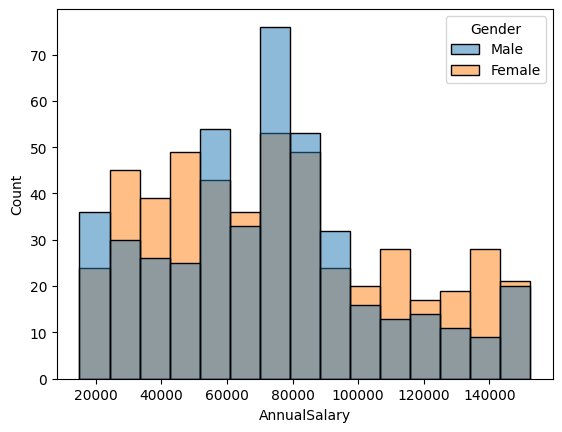

In [38]:
sns.histplot(x="AnnualSalary",data=df,hue="Gender")

<Axes: xlabel='Age', ylabel='Count'>

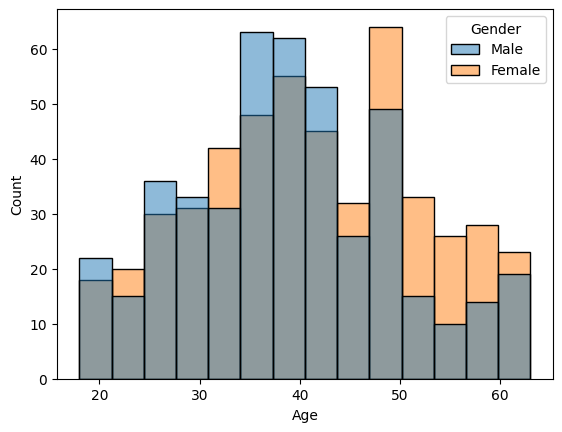

In [39]:
sns.histplot(x="Age",data=df,hue="Gender")

<Axes: xlabel='AnnualSalary', ylabel='Count'>

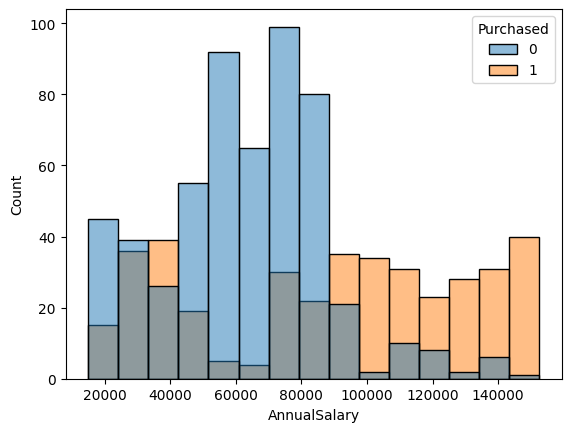

In [40]:
sns.histplot(x="AnnualSalary",data=df,hue="Purchased")

<Axes: xlabel='Age', ylabel='Count'>

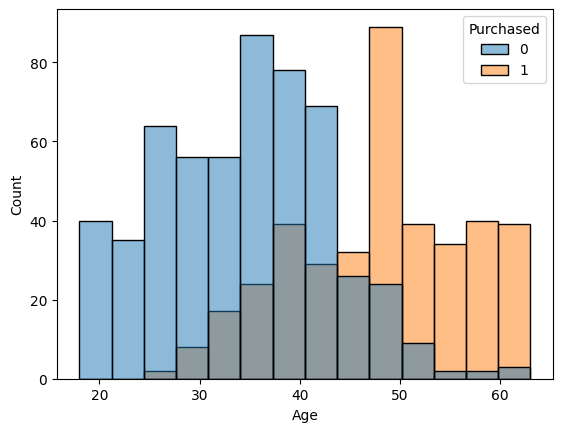

In [41]:
sns.histplot(x="Age",data=df,hue="Purchased")

<Axes: >

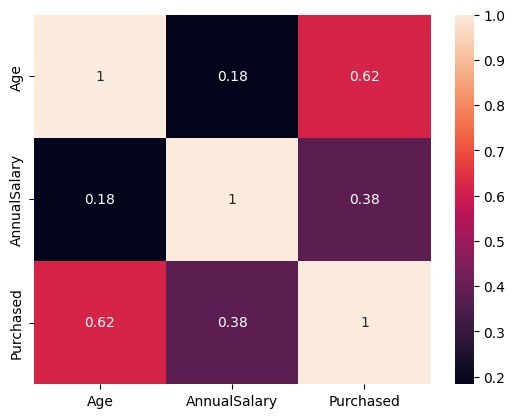

In [45]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [53]:
df.corr(numeric_only=True)["Purchased"].sort_values()

AnnualSalary    0.380619
Age             0.619384
Purchased       1.000000
Name: Purchased, dtype: float64

In [110]:
del df2["Gender_Male"]


KeyError: 'Gender_Male'

In [99]:
Y=df2['Purchased']
X=df2.drop(columns=["Purchased"])

In [100]:
X

,Age,AnnualSalary
User ID,,
385,35,20000
681,40,43500
353,49,74000
895,40,107500
661,25,79000
...,...,...
863,38,59000
800,47,23500
407,28,138500


In [120]:
from sklearn.linear_model import LinearRegression

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
model=LinearRegression()

In [123]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=50,shuffle=True)

In [124]:
model.fit(X_train,Y_train)

LinearRegression()

In [125]:
model.predict(X_test)

array([ 5.12062402e-01,  8.50175225e-01,  6.77604468e-01,  2.58335227e-01,
        6.25186213e-01,  5.05027803e-01,  7.43436031e-01,  7.15956479e-01,
        4.34732029e-01,  1.21560862e-01,  3.29913242e-01,  6.29674054e-01,
        1.07514356e+00,  6.23915788e-01,  9.80550204e-01,  2.03367261e-01,
        4.02773497e-01,  6.60982605e-01,  5.11421282e-01,  5.86961662e-03,
        2.27014862e-01, -1.14285839e-01,  2.30846813e-01,  4.37925815e-01,
        4.70522513e-01,  3.51008177e-01,  4.57741463e-01,  6.58426986e-01,
        4.00211970e-01, -1.59025422e-01,  6.55880228e-01,  3.24802003e-01,
        3.84872347e-01,  1.62465538e-01,  6.48210416e-01,  8.06061994e-01,
        5.47217674e-01,  1.27307313e-01, -5.22832742e-02,  1.37538651e-01,
        5.90048664e-01,  4.19392406e-01,  1.02017559e+00,  7.84978874e-01,
        1.15161476e-01,  3.20967098e-01,  5.29322432e-01,  5.89230840e-02,
       -8.82297857e-03,  3.82325589e-01,  7.36274943e-02,  2.78783135e-01,
        6.14972597e-01,  

In [131]:
model.score(X_test,Y_test)

0.4499547079699394

In [127]:
import joblib

In [128]:
a=joblib.dump(model,"carprediction.pkl")

In [129]:
m=joblib.load("carprediction.pkl")

In [130]:
m.predict([[40,35000]])

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.27558344])

In [133]:
XX=df.drop(columns=["Purchased","AnnualSalary","Gender"])
YY=df["Purchased"]

In [134]:
XX

,Age
User ID,
385,35
681,40
353,49
895,40
661,25
...,...
863,38
800,47
407,28


In [135]:
YY

User ID
385    0
681    0
353    0
895    1
661    0
      ..
863    0
800    0
407    1
299    1
687    0
Name: Purchased, Length: 943, dtype: int64

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [138]:
newmod=LogisticRegression()

In [140]:
XX_train,XX_test,YY_train,YY_test= train_test_split(XX,YY,test_size=0.2,random_state=40)

In [141]:
newmod.fit(XX_train,YY_train)

LogisticRegression()

In [153]:
a=newmod.predict(XX_test)
a=pd.Series(a)

In [155]:
newmod.score(XX_test,YY_test)

0.8201058201058201

In [156]:
joblib.dump(newmod,"FinalCarPredictionModel.pkl")

['FinalCarPredictionModel.pkl']

In [159]:
importmodel=joblib.load("FinalCarPredictionModel.pkl")

In [161]:
importmodel.predict([[40]])

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [162]:
importmodel.predict([[95]])

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)